In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense,LSTM,Embedding
import numpy as np
from sklearn import preprocessing

We load our text

In [ ]:
lyrics_txt=open('kanye_west.txt').read()

We create a Tokenizer object to tokenize our text

In [ ]:
tokenizer=tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(lyrics_txt.lower().split('\n'))
print(tokenizer.word_docs)

defaultdict(<class 'int'>, {'eighteen': 3, 'years': 26, 'she': 309, 'one': 99, 'kids': 39, 'of': 370, 'your': 353, 'got': 340, 'you': 1191, 'for': 270, 'child': 13, 'i': 1624, 'paying': 2, 'know': 310, 'his': 85, 'support': 4, 'somebody': 28, 'crib': 20, 'car': 31, 'and': 964, 'is': 324, 'baby': 80, 'than': 65, 'mama': 21, 'bigger': 5, 'him': 74, 'will': 32, 'given': 3, 'see': 142, 'any': 22, 'tv': 12, 'sunday': 5, 'on': 437, 'win': 3, 'in': 626, 'a': 933, 'the': 1723, 'drive': 23, 'super': 10, 'off': 114, 'hyundai': 1, 'bowl': 4, 'supposed': 14, 'was': 241, 'to': 932, 'tyco': 1, 'money': 67, 'buy': 29, 'with': 341, 'shorty': 13, 'doctor': 5, 'went': 26, 'lipo': 1, 'like': 504, 'walking': 2, 'around': 42, 'michael': 16, 'looking': 22, 'that': 569, 'insured': 1, 'geico': 2, 'shouldve': 6, 'punk': 1, 'if': 212, 'aint': 248, 'no': 177, 'holla': 3, 'prenup': 1, 'yeah': 89, 'want': 89, 'we': 397, 'its': 200, 'need': 114, 'have': 114, 'something': 37, 'leave': 24, 'ass': 59, 'half': 13, 'cau

Now we generate our n-grams

In [ ]:
sequences_list=lyrics_txt.split('\n')
tokenized_ngram_list=[]
for word_sequence in sequences_list:
  tokenized_sequence=tokenizer.texts_to_sequences([word_sequence])[0]
  #generate N-grams
  for i in range(1,len(tokenized_sequence)):
    n_gram=tokenized_sequence[:i+1]
    #print(n_gram)
    tokenized_ngram_list.append(n_gram)
print(tokenized_ngram_list)
max_len=max([len(n_gram) for n_gram in tokenized_ngram_list])
#Now we pad the sequences
tokenized_ngram_list=tf.keras.utils.pad_sequences(tokenized_ngram_list,max_len,padding='pre')
tokenized_ngram_array=np.array(tokenized_ngram_list)
print(tokenized_ngram_array)
#tokens_array=tf.keras.utils.pad_sequences(tokens_array)

[[928, 240], [928, 240, 928], [928, 240, 928, 240], [22, 23], [22, 23, 76], [22, 23, 76, 18], [22, 23, 76, 18, 17], [22, 23, 76, 18, 17, 174], [22, 23, 76, 18, 17, 174, 23], [22, 23, 76, 18, 17, 174, 23, 3], [22, 23, 76, 18, 17, 174, 23, 3, 32], [22, 23, 76, 18, 17, 174, 23, 3, 32, 928], [22, 23, 76, 18, 17, 174, 23, 3, 32, 928, 240], [2, 26], [2, 26, 241], [2, 26, 241, 1744], [2, 26, 241, 1744, 410], [2, 26, 241, 1744, 410, 1098], [2, 26, 241, 1744, 410, 1098, 32], [2, 26, 241, 1744, 410, 1098, 32, 76], [2, 26, 241, 1744, 410, 1098, 32, 76, 18], [2, 26, 241, 1744, 410, 1098, 32, 76, 18, 97], [2, 26, 241, 1744, 410, 1098, 32, 76, 18, 97, 174], [97, 101], [97, 101, 294], [97, 101, 294, 214], [97, 101, 294, 214, 5], [97, 101, 294, 214, 5, 321], [97, 101, 294, 214, 5, 321, 25], [97, 101, 294, 214, 5, 321, 25, 929], [97, 101, 294, 214, 5, 321, 25, 929, 120], [97, 101, 294, 214, 5, 321, 25, 929, 120, 97], [3, 207], [3, 207, 57], [3, 207, 57, 111], [3, 207, 57, 111, 14], [3, 207, 57, 111, 14

Create the predictors and the labels

In [ ]:
predictors,labels =tokenized_ngram_array[:,:-1],tokenized_ngram_array[:,-1]

In [ ]:
predictors

array([[  0,   0,   0, ...,   0,   0, 928],
       [  0,   0,   0, ...,   0, 928, 240],
       [  0,   0,   0, ..., 928, 240, 928],
       ...,
       [  0,   0,   0, ...,  61, 814,   6],
       [  0,   0,   0, ...,   0,   0,  25],
       [  0,   0,   0, ...,   0,  25,   9]], dtype=int32)

In [ ]:
labels.shape

(45202,)

encode the labels

In [ ]:
y=keras.utils.to_categorical(labels,num_classes=len(tokenizer.word_index)+1)
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Create a model

In [ ]:
from keras.src.layers import GlobalMaxPool1D
from keras.src.layers.rnn import Bidirectional
def create_model(vocabulary_size,seq_length):
  model=keras.Sequential(name='mymodel')
  model.add(Embedding(vocabulary_size,100,input_length=seq_length))
  model.add(Bidirectional(LSTM(150,return_sequences=True)))
  model.add(GlobalMaxPool1D())
  model.add(Dense(vocabulary_size,activation="softmax"))
  model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
  model.summary()
  return model





In [ ]:
vocabulary_size=len(tokenizer.word_index) + 1
seq_length=predictors.shape[1]
model=create_model(vocabulary_size,seq_length)

Model: "mymodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 18, 100)           614100    
                                                                 
 bidirectional (Bidirection  (None, 18, 300)           301200    
 al)                                                             
                                                                 
 global_max_pooling1d (Glob  (None, 300)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 6141)              1848441   
                                                                 
Total params: 2763741 (10.54 MB)
Trainable params: 2763741 (10.54 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
1413/1413 [==============================] - 206s 142ms/step - loss: 6.7217 - accuracy: 0.0443
Epoch 2/10
1413/1413 [==============================] - 173s 122ms/step - loss: 6.1683 - accuracy: 0.0462
Epoch 3/10
1413/1413 [==============================] - 154s 109ms/step - loss: 5.8836 - accuracy: 0.0550
Epoch 4/10
1413/1413 [==============================] - 183s 129ms/step - loss: 5.5783 - accuracy: 0.0742
Epoch 5/10
1413/1413 [==============================] - 222s 157ms/step - loss: 5.3132 - accuracy: 0.0853
Epoch 6/10
1413/1413 [==============================] - 207s 147ms/step - loss: 5.0518 - accuracy: 0.0973
Epoch 7/10
1413/1413 [==============================] - 211s 149ms/step - loss: 4.8086 - accuracy: 0.1126
Epoch 8/10
1413/1413 [==============================] - 169s 119ms/step - loss: 4.5925 - accuracy: 0.1305
Epoch 9/10
1413/1413 [==============================] - 156s 110ms/step - loss: 4.3505 - accuracy: 0.1532
Epoch 10/10
1413/1413 [=======================

<function matplotlib.pyplot.show(close=None, block=None)>

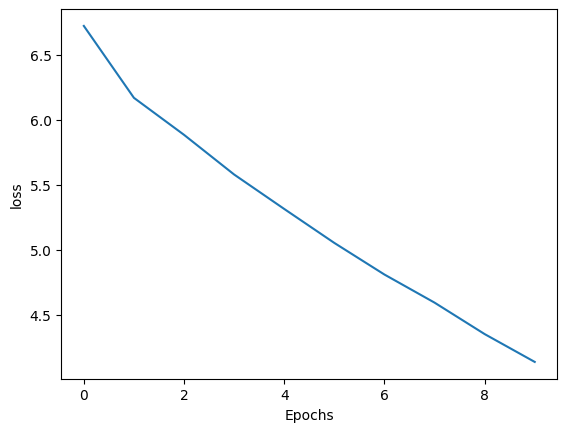

In [ ]:
from keras.src.callbacks import EarlyStopping
es=EarlyStopping(monitor='loss',min_delta=0,patience=10,verbose=0,mode='auto')
history=model.fit(predictors,y,epochs=10,verbose=1,callbacks=[es],shuffle=False)
model.save('kanye')
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel('loss')
plt.show

A function to generate lyrics

In [ ]:
model=keras.models.load_model('kanye')
seed_text="who are you"
next_word=20

for _ in range(next_word):
  token_list=tokenizer.texts_to_sequences([seed_text])[0]
  token_list=keras.utils.pad_sequences([token_list],maxlen=predictors.shape[1],padding="pre")
  predicted_token=model.predict(token_list,verbose=0)
  predicted_word_id=np.argmax(predicted_token)
  output_word=""
  for word, index in tokenizer.word_index.items():
    if(index==predicted_word_id):
      output_word=word
      break
  seed_text+=" "+output_word
print(seed_text)


who are you know what you aint amerie it to figure out of the club with the king of the club and get
